In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load your datasets
call_data = pd.read_csv(r'C:\Users\Akhil\AIT Final Project AD\calls_cleaned.csv')  
arrest_data = pd.read_csv(r'C:\Users\Akhil\AIT Final Project AD\arrests_cleaned.csv')

In [4]:
# 1. Calculate response times in the call dataset
call_data['RESPONSE_TIME'] = pd.to_datetime(call_data['ARRIVD_TS']) - pd.to_datetime(call_data['DISP_TS'])
call_data['RESPONSE_TIME'] = call_data['RESPONSE_TIME'].dt.total_seconds()  # Convert to seconds

In [5]:
# 2. Aggregate response times by precinct or borough
response_time_agg = call_data.groupby(['NYPD_PCT_CD']).agg({
    'RESPONSE_TIME': ['mean', 'median', 'std', 'count']
}).reset_index()
response_time_agg.columns = ['PRECINCT', 'AVG_RESPONSE_TIME', 'MEDIAN_RESPONSE_TIME', 'STD_RESPONSE_TIME', 'CALL_COUNT']


In [6]:
# 3. Aggregate arrest data by precinct
arrest_count_agg = arrest_data.groupby(['ARREST_PRECINCT']).agg({
    'ARREST_KEY': 'count'
}).reset_index()
arrest_count_agg.columns = ['PRECINCT', 'ARREST_COUNT']


In [7]:
# 4. Merge datasets on precinct
merged_data = pd.merge(response_time_agg, arrest_count_agg, on='PRECINCT', how='inner')


In [8]:
# 5. Analyze correlation
correlation = merged_data[['AVG_RESPONSE_TIME', 'ARREST_COUNT']].corr()
print("Correlation Matrix:")
print(correlation)


Correlation Matrix:
                   AVG_RESPONSE_TIME  ARREST_COUNT
AVG_RESPONSE_TIME           1.000000      0.255771
ARREST_COUNT                0.255771      1.000000


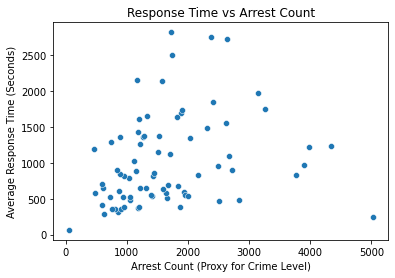

In [9]:
# 6. Visualize the results
sns.scatterplot(data=merged_data, x='ARREST_COUNT', y='AVG_RESPONSE_TIME')
plt.title('Response Time vs Arrest Count')
plt.xlabel('Arrest Count (Proxy for Crime Level)')
plt.ylabel('Average Response Time (Seconds)')
plt.show()


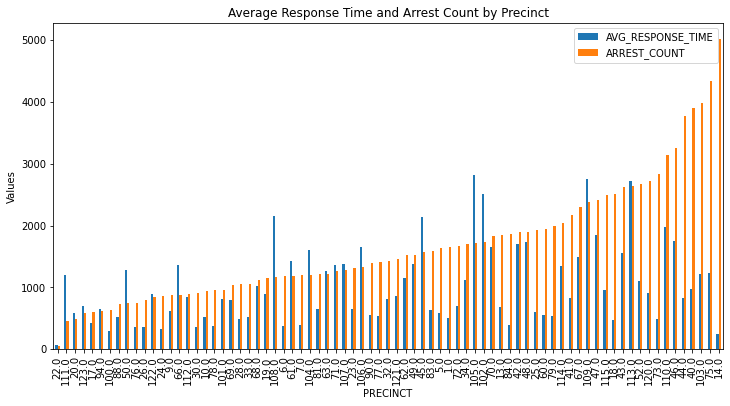

In [10]:
# 7. Optional: Bar chart for better comparison
merged_data.sort_values('ARREST_COUNT', inplace=True)
merged_data.plot(x='PRECINCT', y=['AVG_RESPONSE_TIME', 'ARREST_COUNT'], kind='bar', figsize=(12, 6))
plt.title('Average Response Time and Arrest Count by Precinct')
plt.ylabel('Values')
plt.show()